In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import pickle

#.py
from core import qlearning as q
from core import prices as pr

# Replication of the paper's results

In [2]:
# Path to the pickle file
pickle_file_path = '/Volumes/OS-Data/Suzie_data/RLandPricing/data/data_rep.pkl'

# Open the file in binary read mode
with open(pickle_file_path, 'rb') as file:
    aggregated_agents = pickle.load(file)

# Now, "aggregated_agents" contains the object saved in the pickle file
print(aggregated_agents)

[array([[0.27058729, 0.28303306],
       [0.28415792, 0.28117245],
       [0.23941838, 0.31483911],
       ...,
       [0.25304582, 0.2698367 ],
       [0.28444976, 0.27381853],
       [0.29431361, 0.26881472]]), array([[0.27334632, 0.29358107],
       [0.27819365, 0.27981626],
       [0.28613687, 0.25439432],
       ...,
       [0.30309821, 0.29478741],
       [0.29822894, 0.30436737],
       [0.31487046, 0.28162781]]), array([[0.29386546, 0.29227799],
       [0.26842979, 0.2670245 ],
       [0.27423639, 0.27983892],
       ...,
       [0.29274146, 0.27517   ],
       [0.30280732, 0.27917773],
       [0.30069404, 0.28184368]]), array([[0.29420586, 0.28052477],
       [0.29148855, 0.26597485],
       [0.2698751 , 0.28600191],
       ...,
       [0.29646808, 0.28353451],
       [0.28088044, 0.29179827],
       [0.30359119, 0.27821371]]), array([[0.28720538, 0.25429293],
       [0.28951565, 0.29671266],
       [0.30025074, 0.26816505],
       ...,
       [0.26428755, 0.25876752],
       

/var/folders/1v/lw80nwsd61d7sp0q_pzj0ppm0000gp/T/ipykernel_1038/3056495399.py:49: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/Volumes/OS-Data/Suzie_data/RLandPricing/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


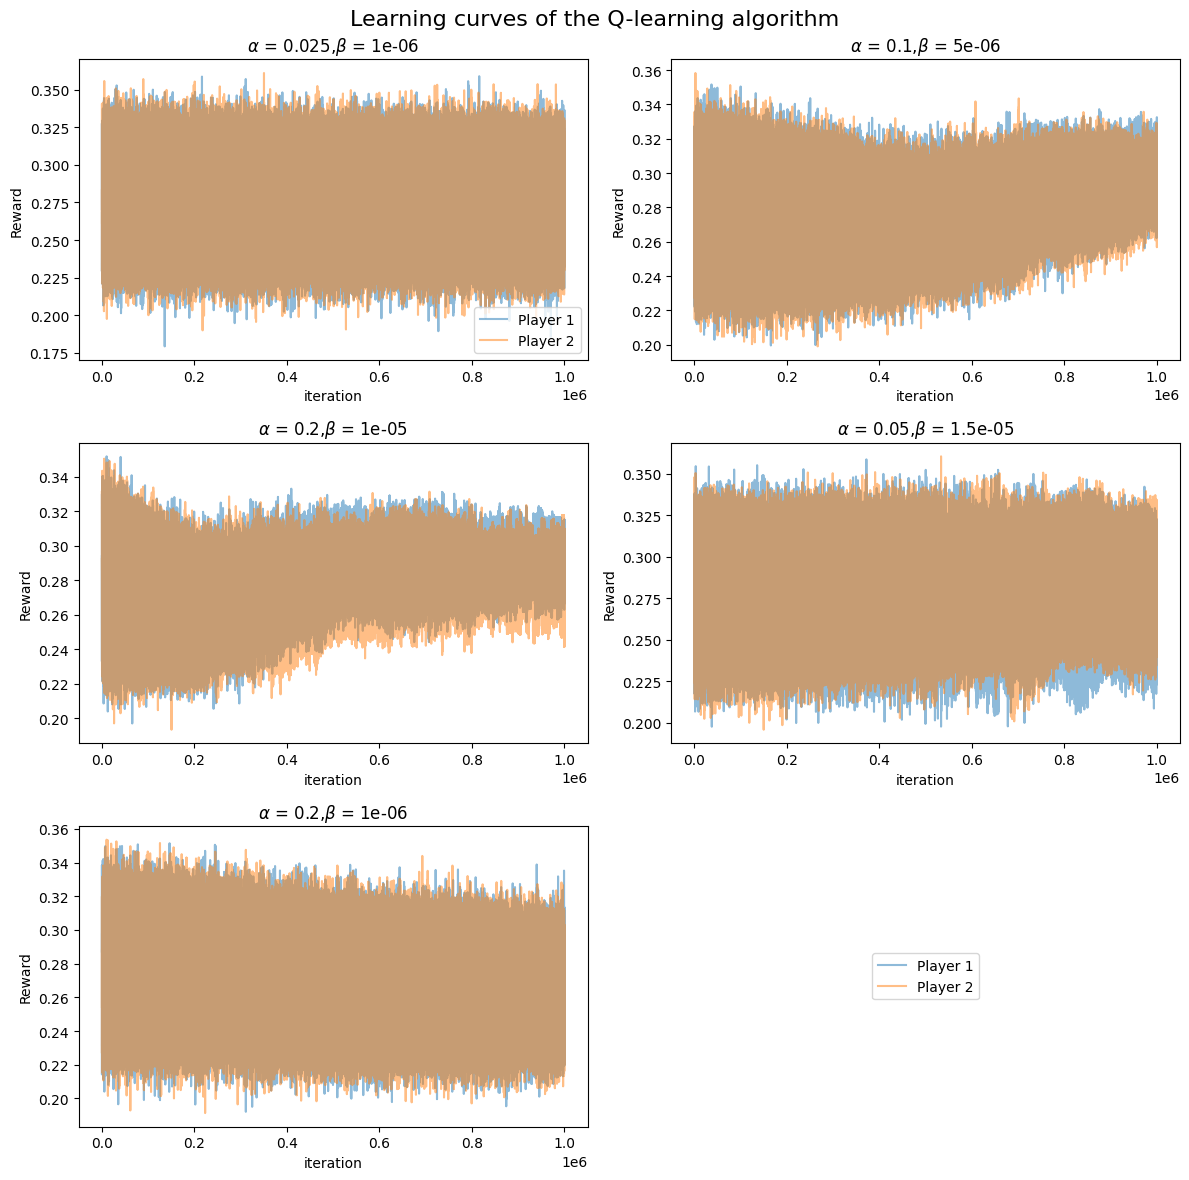

In [3]:
agg = np.array(aggregated_agents).mean(axis=1)
num_players = 2
num_graphs = len(agg)
rep = [[0.025,10**(-6)],[0.1,0.5*10**(-5)],[0.2,10**(-5)],[0.05,1.5*10**(-5)],[0.2,10**(-6)]]

# Create a figure with a 3x2 grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))

# Flatten the axes array to iterate over the subplots
axes = axes.flatten()

# Loop to iterate through the periods and subplots
for graph_num in range(num_graphs):
    ax = axes[graph_num]
    num_players = len(agg[graph_num][0])
    # Plot curves for each player in the subplot
    for player in range(num_players):
        ax.plot(agg[graph_num][:, player], alpha=0.5, label=f'Player {player + 1}')
    
    # Set the title of the subplot with the corresponding period
    ax.set_title(f'$\\alpha$ = {rep[graph_num][0]},$\\beta$ = {round(rep[graph_num][1],8)}')
    
    # Set the labels of the subplot
    ax.set_xlabel('iteration')
    ax.set_ylabel('Reward')

    # Add a legend to the first subplot
    if graph_num == 0:
        ax.legend()

# Remove any unused subplots
if num_graphs < 5:
    for i in range(num_graphs, 5):
        fig.delaxes(axes[i])

# Create a legend in the last subplot
legend_ax = axes[-1]
legend_ax.axis('off')

# Get the legend handles and labels from the first subplot
handles, labels = axes[0].get_legend_handles_labels()

# Create the legend in the last subplot
legend_ax.legend(handles, labels, loc='center')


fig.suptitle('Learning curves of the Q-learning algorithm', fontsize=16)

# Adjust the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()

In [16]:
prices = pr.PriceOptimizer()
collusion_profit, collusion_prices = prices.CollusionPrice()
nash_profit, nash_prices = prices.NashPrice()
RN = nash_profit
RC = collusion_profit
    
Rmean = np.zeros((len(aggregated_agents), 2))
DRmean = np.zeros((len(aggregated_agents), 2))   
    
for i in range (len(aggregated_agents)): 
    for j in range (2):
        Rmean[i][j] = aggregated_agents[i][-100:,j].mean()
        DRmean[i][j] = (Rmean[i][j] - RN)/(RC - RN) 

print(DRmean)

[[0.41169955 0.52051923]
 [0.45032623 0.5534557 ]
 [0.50195277 0.45993862]
 [0.54556806 0.47764527]
 [0.57359625 0.45224607]]


[0.46610939 0.50189097 0.48094569 0.51160667 0.51292116]


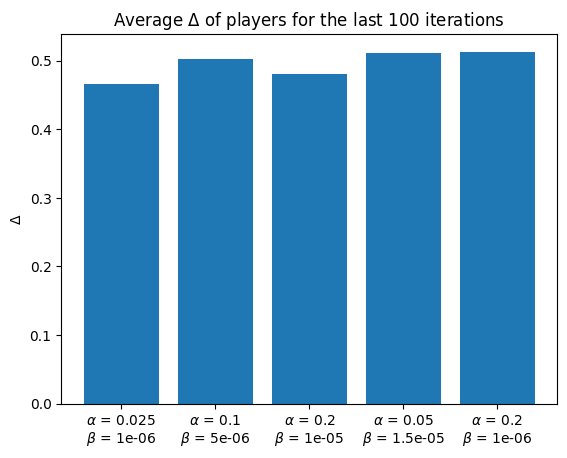

In [35]:
av = np.mean(DRmean, axis=1)
print(av)
fig.set_size_inches(8, 16)
plt.bar([f'$\\alpha$ = {rep[graph_num][0]}\n$\\beta$ = {round(rep[graph_num][1],8)}' for graph_num 
         in range(len(rep))],av)
plt.ylabel('$\\Delta$')
plt.title('Average $\\Delta$ of players for the last 100 iterations')
plt.show()